In [ ]:
!streamlit run app.py


  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://192.168.1.4:8501

[*********************100%%**********************]  1 of 1 completed
/Users/adarshpandey/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
[*********************100%%**********************]  1 of 1 completed
/Users/adarshpandey/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if _pandas_api.is_sparse(col):
[*********************100%%**********************]  1 of 1 completed
/Users/adarshpandey/anaconda3/lib/python3.11/site-packages/pyarrow/pandas_compat.py:373: FutureWarning: is_sparse is deprecated and will be removed in a fu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
import yfinance as yf

start = '2010-01-01'
end = '2021-12-31'


df = yf.download('AAPL', start=start, end=end)


df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-12-23,175.850006,176.850006,175.270004,176.279999,174.288635,68356600
2021-12-27,177.089996,180.419998,177.070007,180.330002,178.292892,74919600
2021-12-28,180.160004,181.330002,178.529999,179.289993,177.264618,79144300
2021-12-29,179.330002,180.630005,178.139999,179.380005,177.353622,62348900
2021-12-30,179.470001,180.570007,178.089996,178.199997,176.186935,59773000


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478998,493729600
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386964,552160000
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417541,447610800


In [5]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,7.622500,7.660714,7.585000,7.643214,493729600
1,7.664286,7.699643,7.616071,7.656429,601904800
2,7.656429,7.686786,7.526786,7.534643,552160000
3,7.562500,7.571429,7.466071,7.520714,477131200
4,7.510714,7.571429,7.466429,7.570714,447610800


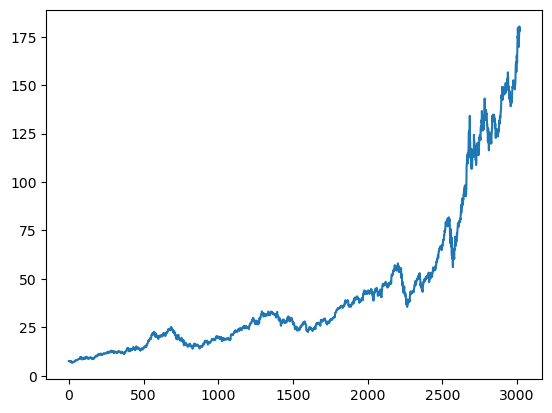

In [6]:
plt.plot(df.Close)

(3020, 5)

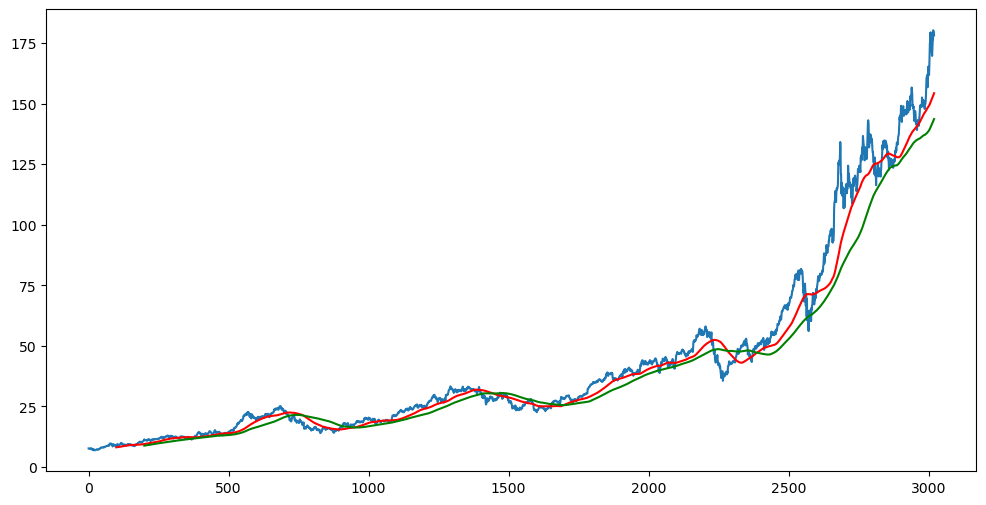

In [7]:
ma100 = df['Close'].rolling(100).mean()
ma200 = df['Close'].rolling(200).mean()
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')
df.shape

In [8]:
# Splitting data into training and testing
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)
data_training.head()
data_testing.head()


(2114, 1)
(906, 1)


,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [10]:
data_training_array = scaler.fit_transform(data_training)
data_training_array
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [40]:
# ML Modelfrom 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [12]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [13]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
63/63 [==============================] - 7s 90ms/step - loss: 0.0388
Epoch 2/50
63/63 [==============================] - 6s 92ms/step - loss: 0.0085
Epoch 3/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0071
Epoch 4/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0062
Epoch 5/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0061
Epoch 6/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0055
Epoch 7/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0050
Epoch 8/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0048
Epoch 9/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0049
Epoch 10/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0044
Epoch 11/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0041
Epoch 12/50
63/63 [==============================] - 6s 93ms/step - loss: 0.0042
Epoch 13/50
63/63 [==================

In [14]:
model.save('keras_model.h5')

/Users/adarshpandey/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
data_testing.head()

,Close
2114,46.974998
2115,46.875000
2116,46.717499
2117,47.560001
2118,47.957500


In [16]:
data_training.tail(100)

,Close
2014,43.057499
2015,43.257500
2016,43.750000
2017,43.587502
2018,43.582500
...,...
2109,46.907501
2110,46.790001
2111,47.090000
2112,47.037498


In [17]:
import pandas as pd
!pip install --upgrade pandas

In [18]:
past_100_days = pd.DataFrame(data_training.tail(100))
data_testing_df = pd.DataFrame(data_testing.values, columns=data_testing.columns)  # Ensure data_testing is a DataFrame

In [19]:
final_df = pd.concat([past_100_days, data_testing_df], ignore_index=True)
final_df.head()

,Close
0,43.057499
1,43.257500
2,43.750000
3,43.587502
4,43.582500


In [20]:
input_data = scaler.fit_transform(final_df)
input_data.shape

(1006, 1)

In [21]:
x_test = []
y_test = []

for i in range (100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(906, 100, 1)
(906,)


In [22]:
y_predicted = model.predict(x_test)
y_predicted.shape

29/29 [==============================] - 1s 23ms/step


(906, 1)

In [23]:
scaler.scale_

array([0.00690691])

In [24]:
scale_factor = 1/0.00690691
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

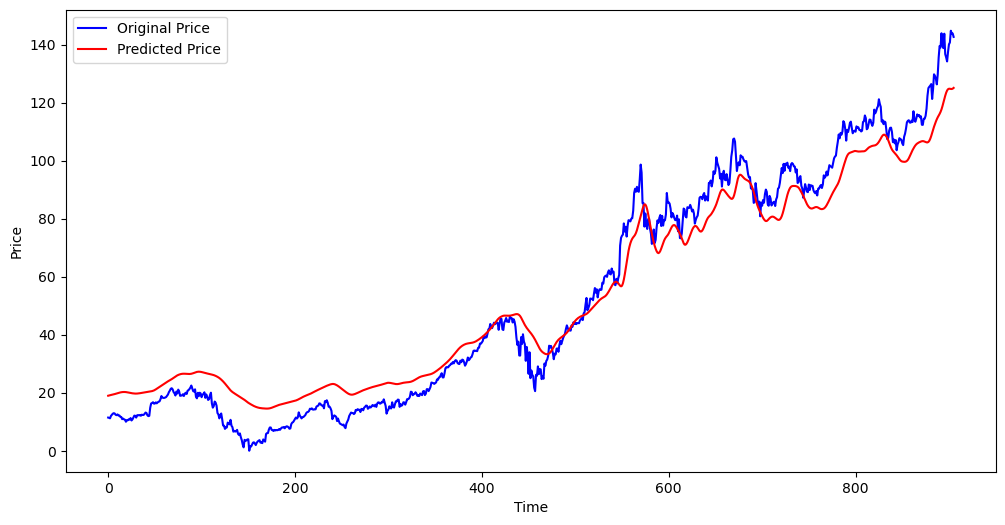

In [25]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
# Calculate and print accuracy
threshold = 0.02 # Adjust as needed
accuracy = np.sum(np.abs(y_test - y_predicted) < threshold) / len(y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Calculate and print Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error (MSE): {mse}')

# Calculate and print Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_predicted)
print(f'Mean Absolute Error (MAE): {mae}')



Accuracy: 39.29%
Mean Squared Error (MSE): 72.87952887697969
Mean Absolute Error (MAE): 7.364454037446263
